# **Foundations of Data Science Fall 2022 - Homework 2 (30 points)**

### Student Name: Pranjal Jain
### Student Net Id: pj2069

---

### **Part 1: Preparing a Training Set and Training a Decision Tree (10 Points)**

---




This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Brightspace).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

In [55]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from collections import defaultdict
import statistics
import seaborn as sns
from sklearn import tree
%matplotlib inline

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [57]:
# Place your code here
df = pd.read_csv('cell2cell_data.csv')
training_df = df.sample(frac = 0.8) 
testing_df = df.drop(training_df.index)

2\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [58]:
# Place your code here
X_features = ['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls']
Y_target = ['churndep']
classifierDecisionTree = DecisionTreeClassifier(criterion= 'entropy')
classifierDecisionTree.fit(training_df[X_features], training_df[Y_target])

DecisionTreeClassifier(criterion='entropy')

3\. Using the resulting model from 1.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

Text(0, 0.5, 'Feature Impact')

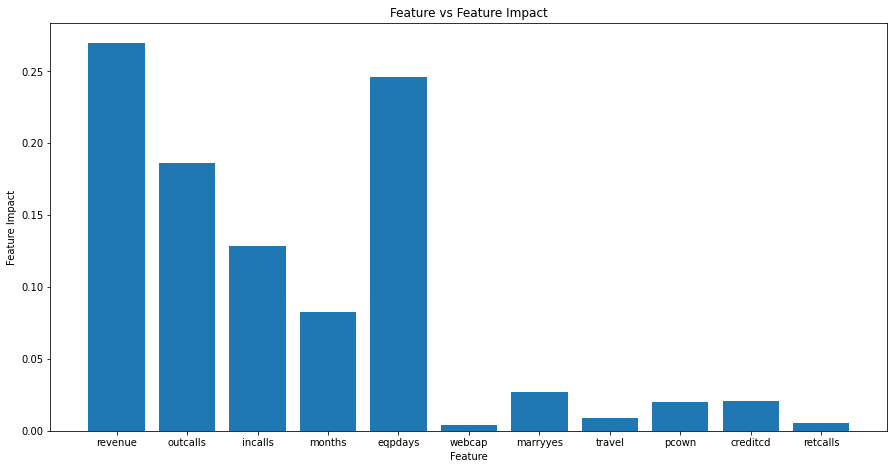

In [59]:
# Place your code here
y = classifierDecisionTree.feature_importances_
x = ['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls']
plt.figure(figsize=(15, 7.5))
plt.bar(x, y)
plt.title('Feature vs Feature Impact')
plt.xlabel('Feature')
plt.ylabel('Feature Impact')

4\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

Text(0.5, 1.0, 'Correlation for top three features')

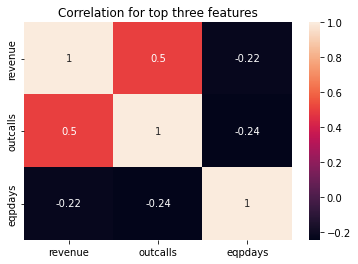

In [60]:
# Place your code here
important_features = ['revenue','outcalls','eqpdays']
df_corr = df[important_features]
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation for top three features')

The top three important features are (in order):


1.   revenue
2.   outcalls
3.   eqpdays

Revenue and Outcalls have a high positive correlation. eqpdays has a less negative correlation with both of them

High revenue and High Outcalls equates to less churn due to more use of services. High EQPdays correlates to more churn meaning equiment is being used for more days

By increasing outcalls and revenue, and decreasing epqdays we can decrease churn. We can do this by getting them to use as many services as possible and make more calls. We can also upgrade the product to reduce epqdays.



5\. Using the classifier built in 1.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(2 Points)

In [61]:
# Place your code here
Y_trainpred = classifierDecisionTree.predict(training_df[X_features])
print("Train Acc:",metrics.accuracy_score(training_df[Y_target], Y_trainpred))
Y_pred = classifierDecisionTree.predict(testing_df[X_features])
print("Test Acc:",metrics.accuracy_score(testing_df[Y_target], Y_pred))

Train Acc: 0.9998744743613883
Test Acc: 0.536086356219405


### **Part 2 - Finding a Good Decision Tree (Total 10 Points)**


The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [62]:
# Place your code here
split_samples = [10,150,310,625,1250,2500,5000,10000,20000,39859]
leaf_samples =  [2,4,8,16,32,64,128,256,512,1024]

2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

*Place your response here*

By taking the split_samples in this range, we can keep decreasing from a total of 39859 down to 10, by reducing by a factor of 2, gives us an equal distribution of the split_samples

Similarly we can increase the leaf samples by a factor of 2 and keep increasing till it covers a fair range.


3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

Max Accuracy: 0.5975900589933476  when min_samples_leaf  128  and min_samples_split 625


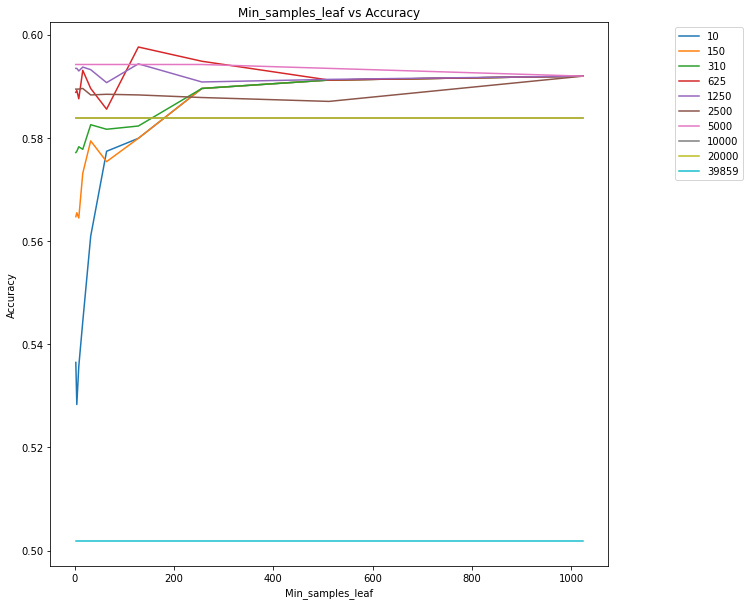

In [63]:
# Place your code here
plt.figure(figsize=(10,10))
max = 0
leaf_pos_maximum = 0
sample_split_max = 0

for i in split_samples:
  acc = []

  for j in leaf_samples:
    
    classifier = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = i, min_samples_leaf= j)
    classifier.fit(training_df[X_features], training_df[Y_target])
    y_pred = classifier.predict(testing_df[X_features])
    acc.append(metrics.accuracy_score(testing_df[Y_target], y_pred))
    
    if  metrics.accuracy_score(testing_df[Y_target], y_pred)> max:
      max = metrics.accuracy_score(testing_df[Y_target], y_pred)
      leaf_pos_maximum = j
      sample_split_maximum = i
  
  
  plt.plot(leaf_samples, acc, label= i)
  plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right') 
  plt.title('Min_samples_leaf vs Accuracy')
  plt.xlabel('Min_samples_leaf')
  plt.ylabel('Accuracy') 
print('Max Accuracy:',max,' when min_samples_leaf ',leaf_pos_maximum,' and min_samples_split',sample_split_maximum)

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

The most accurate configuration for the specified ranges is achieved when min_samples_split = 2500 and min_samples_leaf = 256. The accuracy is 0.59 (This accuracy might vary since, the split data is changed everytime we run the program)

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

*Place your response here*

Churn Prediction model can be implemented in business to understand the likeliness of being churned. This can be then implemented to understand how we can retain them and decrease churn

This prediction model also helps to understand how various features impact on churn and combat them.

### **Part 3: Model selection with cross-validation (5 points)**


In this part, we will focus on cross-validation to find a good value for parameter `max_depth`.


1\. Write a cross-validation function that does the following:
- Takes as inputs a dataset, a label name, # of splits/folds (`k`), and a sequence of values for the maximum depth of the tree (`max_depth`). 
- Shuffles the data.
- Splits the data into `k` folds according to the cross-validation logic
- Performs two loops
  - Outer Loop: `for each f in range(k)`:
    - Inner Loop: `for each value in max_depth_sequence`:
      - Trains a Decision Tree on the training split with the `max_depth=value` (USE criterion='entropy' BUT DO NOT ALTER THE OTHER PARAMETERS)
      - Computes accuracy_value_f on test split
      - Stores accuracy_value_f in a  dictionary of values
- Returns a dictionary, where each key-value pair is: `value:[accuracy_value_1,...,accuracy_value_k]`

(2 Points)

In [64]:
from random import seed
from random import randrange
 
def cross_val_split(dataset, folds):
	dataset_splitAns = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) // folds)
	for i in range(folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_splitAns.append(fold)
	return dataset_splitAns

In [65]:
def valDecTree(dataset, label_name, k, max_depth_sequence):
  strr = ['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls',  'churndep']
  dataset2 = dataset.to_numpy()
  
  acc_value = {}
  for i in max_depth_sequence:
    acc_value[i]=[]
  
  kfold = cross_val_split(dataset2, k)

  for i in range(k):
    kfoldCopy = kfold.copy()
    
    datasetFoldTest = pd.DataFrame(kfoldCopy[i], columns = strr)
    kfoldCopy.pop(i)
    datasetFoldTrain =kfoldCopy
    
    flat_list = [item for sublist in kfoldCopy for item in sublist]
    
    datasetFoldTrain = pd.DataFrame(flat_list, columns = strr)

    for value in max_depth_sequence:
      classifier_kFold = DecisionTreeClassifier(criterion = 'entropy', max_depth=value)
      classifier_kFold.fit(datasetFoldTrain[X_features], datasetFoldTrain[label_name])
      
      y_pred = classifier_kFold.predict(datasetFoldTest[X_features])
      acc_value[value].append(metrics.accuracy_score(datasetFoldTest[label_name], y_pred))

  return acc_value
    
  


2\. Using the function written above, do the following:
- Generate a sequence `max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]` (Note that None is the default value for this parameter).
2.	Call accs = xValDecisionTree(dataset, 'churndep', 10, `max_depth_sequence`)
3.  For each value in accs.keys(), calculate mean(accs[value]). What value is associated with the highest accuracy mean?
4.  For each value in accs.keys(), calculate the ranges mean(accs[value]) +/- std(accs[value]). Do the ranges associated with the value that has the highest mean(accs[value]) overlap with ranges for other values? What may this suggest and what are the limitations of a standard deviation based analysis in this scenario?

5.  Which depth value would you pick, if any, and why?

(3 Points)

In [66]:
# Place your code here
max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]
accuracy = valDecTree(df, 'churndep', 10, max_depth_sequence)
print(accuracy)


for i in max_depth_sequence:
  print("Max Depth:",[i],
        "mean: ",statistics.mean(accuracy[i]),
        "  std:",statistics.stdev(accuracy[i]),
        " mean-std ",statistics.mean(accuracy[i]) - statistics.stdev(accuracy[i]) ,
        " mean+std ",statistics.mean(accuracy[i]) + statistics.stdev(accuracy[i]))

{None: [0.5295003766005524, 0.5397941250313834, 0.5274918403213658, 0.5473261360783329, 0.5279939743911625, 0.5207130303791112, 0.5370323876475018, 0.5272407732864675, 0.5352749184032136, 0.5222194325885011], 2: [0.584484057243284, 0.5857393924177755, 0.5809691187547075, 0.5744413758473512, 0.5940246045694201, 0.600301280441878, 0.584484057243284, 0.5659050966608085, 0.5822244539291991, 0.5689179010795883], 4: [0.5942756716043184, 0.594777805674115, 0.5902585990459452, 0.5854883253828772, 0.6038162189304545, 0.6078332914888275, 0.5980416771277931, 0.5905096660808435, 0.5987948782324881, 0.5859904594526739], 8: [0.6005523474767763, 0.5917650012553352, 0.5910118001506403, 0.5849861913130806, 0.5970374089881999, 0.604318353000251, 0.5930203364298268, 0.5890032638714536, 0.6010544815465729, 0.5854883253828772], 16: [0.5649008285212151, 0.5714285714285714, 0.5669093648004017, 0.5784584484057244, 0.5618880241024353, 0.5807180517198092, 0.5646497614863168, 0.5548581471252825, 0.58448405724328

The highest accuracy mean is with max_depth_value=4

The ranges associated with 4 overlap with that of max_depth_value = 8. This suggests that classifier with depth of 4 and 8 have a similar accuracies and vary by just a small amount. The limitation of standard deviation is that it does not indicate the scatter of data and increases ambuiguity. In this scenario, the standard deviation is as it very low for all the depths hence not useful.

I would pick a depth of 4 since it has the highest mean and also a low standard deviation.

### **Part 4: Boosting (5 Points)**


Now, as we covered in class, ensemble methods are often used to improve performance. 

1. Implement the boosting algorithm: XGBoost for the same `cell2cell_data.csv` task as above. You will have to select how to tune hyperparameters. Besides depth, which other hyperparametrs do you optimize for? (2 points)

*Place your answer here regarding hyperparameters.*

In [67]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
# Place your code here

xgbc = xgb.XGBClassifier( gamma=0,max_depth=4,reg_lambda=1)
print(xgbc)

xgbc.fit(training_df[X_features], training_df[Y_target])

# - cross validataion
scores = cross_val_score(xgbc, training_df[X_features], training_df[Y_target], cv=10)
print("Mean cross-val: " , scores.mean())

ypred = xgbc.predict(testing_df[X_features])
cm = confusion_matrix(testing_df[Y_target],ypred)
print(cm)



XGBClassifier(max_depth=4)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Mean cross-val:  0.5975019751261156
[[1915 2083]
 [1108 2861]]


2. Now compare the XGBoost performance to the decision tree implementation from part 3. Describe in text how they compare, and if this aligns with what you expect. (3 points)

0.5975019751261156 0.5975900589933476


<BarContainer object of 2 artists>

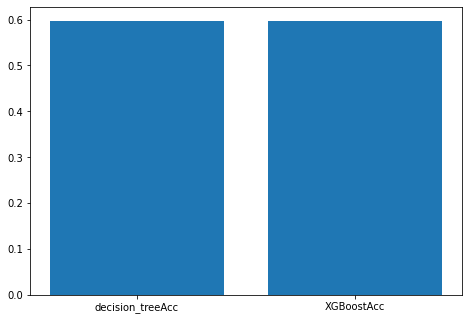

In [68]:
decision_treeAcc = max
XGBoostAcc = scores.mean()

acc = [decision_treeAcc, XGBoostAcc]
lab = ["decision_treeAcc", "XGBoostAcc"]
print(XGBoostAcc,decision_treeAcc)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(lab, acc)

*Place your response text here regarding the comparison.*

XGBoost has a higher accuracy than decision tree classifier.

We can set the max depth as 4 as it will limit the tree's total depth
we can also set regularisation lambda to only have relevant features contribute to score.

## End of homework